In [96]:
import pickle
import pandas as pd

In [97]:
columns = columns=["requestNumber", "userType", "priorityType", "latency", "backoffMechanism"]
requestLogs = pd.DataFrame(columns=columns)

In [98]:
pickleFiles = {"base+jitter": "1) sl = Exponential + Jitter", 
               "base+jitter+min": "2) minSl = min(threshold, sl)", 
               "base+jitter+min+random": "3) randSl = random(0, minSl)", 
               "base+jitter+inverse": "4) minSl / (2 + random(0,minSl/2))",
              }
for file in pickleFiles.keys():
    with open(file + '.pkl', 'rb') as handle:
        logs = pickle.load(handle)
    requests = []
    for key in logs:
        timeServed = logs[key][-1]['SERVED']
        requests.append(key.split('/') + [timeServed, pickleFiles[file]])
    data = pd.DataFrame(requests, columns=columns)
    requestLogs = requestLogs.append(data, ignore_index=True)

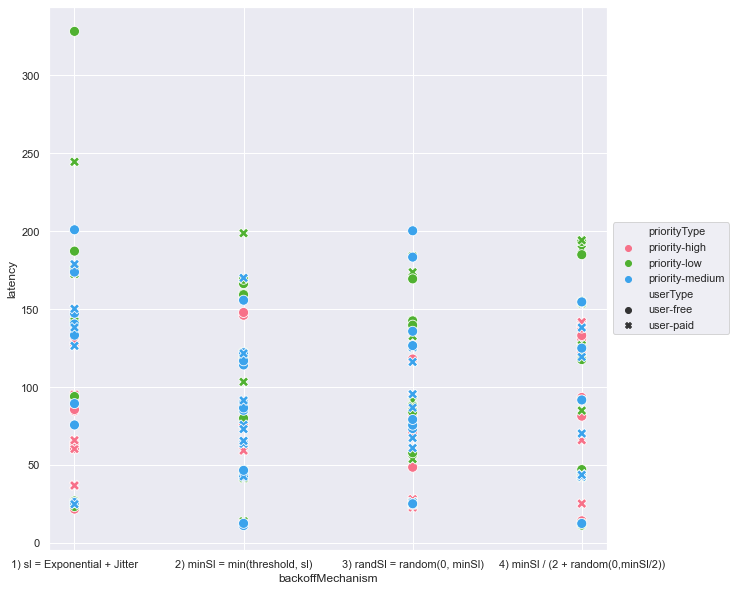

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
# ax.set(yscale="log")
g = sns.scatterplot(data=requestLogs.sort_values(by=['backoffMechanism', 'priorityType'], ascending=True), x="backoffMechanism", y="latency", style="userType", hue="priorityType", 
                palette=sns.color_palette("husl", 3), legend="full", s = 100)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
import plotly.graph_objects as go

backoffMechanism = ['base']
voting_pop = [40, 45.7, 52, 53.6, 54.1, 54.2, 54.5, 54.7, 55.1, 56.6]
reg_voters = [49.1, 42, 52.7, 84.3, 51.7, 61.1, 55.3, 64.2, 91.1, 58.9]

fig = go.Figure()



fig.add_trace(go.Scatter(
    x=voting_pop,
    y=backoffMechanism,
    name='Percent of estimated voting age population',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line_color='rgba(156, 165, 196, 1.0)',
    )
))
fig.add_trace(go.Scatter(
    x=reg_voters, y=backoffMechanism,
    name='Percent of estimated registered voters',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line_color='rgba(217, 217, 217, 1.0)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Latency based on Back Mechanism",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()